In [1]:
models = ['clip', 'albef', 'vilt']
metrics = ['standard_pearson']

In [4]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import cdist
from scipy.stats import ttest_rel
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import torch

from fsk.dataprep.utils import (
    get_concepts_info, get_feature_idx_map, get_fsk, 
    get_fsk_features, get_synsets_ids
)

from fsk.similarity.sem_distances import get_mcrae_features

from IPython.display import Image
#pd.set_option('display.max_rows', None)

In [5]:
project_path = Path('/Users/m_vilas/projects/fsk-multimodal')
res_path = project_path / 'results/'
image_path = project_path / 'dataset/things/object_images'

In [6]:
# Synsets and Concepts data
s_ids, concepts = get_synsets_ids(project_path / 'dataset')
synsets = list(s_ids.keys())
mcrae_concepts = concepts['mcrae']
things_concepts = concepts['things']
concepts_info = get_concepts_info(project_path / 'dataset')

# Features data
fsk = get_fsk(project_path / 'dataset')
ft_idx = get_feature_idx_map(project_path / 'dataset/annotations')
ft_idx = {val: key for key, val in ft_idx.items()}
fsk_ft = get_fsk_features(project_path / 'dataset')
mcrae_ft = get_mcrae_features(project_path, list(s_ids.keys()), mcrae_concepts, None)
sem_ft = mcrae_ft.values

# Concept Match

__Q:__ Do V+L accurately detect the concept depicted in the image?

In [14]:
top_k = [1, 5, 10]

c_preds = {}
for m in models:
    m_preds = []
    c_match_path = res_path / m / 'concept_match'
    for s, s_imgs in s_ids.items():
        correct_val = synsets.index(s)
        for img in s_imgs:
            val = [s, img]
            i_pred = torch.load(c_match_path / f'{img}.pt', map_location=torch.device('cpu')).to(torch.float64)
            top_indices = i_pred.topk(15)[1]
            val.append([synsets[i] for i in top_indices])
            for t in top_k:
                val.append(correct_val in top_indices[:t])
            m_preds.append(val)
    c_preds[m] = pd.DataFrame(m_preds, columns=['synset', 'image', 'preds', 'top1', 'top5', 'top10'])
    print(m)
    print(f"Top1 accuracy: {c_preds[m]['top1'].mean()}")
    print(f"Top5 accuracy: {c_preds[m]['top5'].mean()}")
    print(f"Top10 accuracy: {c_preds[m]['top10'].mean()}")
    print("\n")


clip
Top1 accuracy: 0.8301542207792207
Top5 accuracy: 0.9659090909090909
Top10 accuracy: 0.9831574675324676


albef
Top1 accuracy: 0.8110795454545454
Top5 accuracy: 0.948051948051948
Top10 accuracy: 0.9638798701298701


vilt
Top1 accuracy: 0.5186688311688312
Top5 accuracy: 0.7719155844155844
Top10 accuracy: 0.8398944805194806




In [72]:
c_preds = pd.concat(c_preds)

s = synsets[0]
c_preds.loc[c_preds['synset']==s]

synset          image                                              preds   top1   top5  top10
clip  0   accordion-n-01  accordion_01b  [accordion-n-01, harp-n-01, harmonica-n-01, ke...   True   True   True
      1   accordion-n-01  accordion_07s  [accordion-n-01, harp-n-01, harmonica-n-01, gr...   True   True   True
      2   accordion-n-01  accordion_11s  [accordion-n-01, harmonica-n-01, bag-n-01, buc...   True   True   True
      3   accordion-n-01  accordion_10s  [accordion-n-01, harmonica-n-01, harp-n-01, ba...   True   True   True
      4   accordion-n-01  accordion_06s  [accordion-n-01, piano-n-01, keyboard-n-01, ha...   True   True   True
      5   accordion-n-01  accordion_13s  [accordion-n-01, harmonica-n-01, piano-n-01, k...   True   True   True
      6   accordion-n-01  accordion_05s  [accordion-n-01, harp-n-01, clarinet-n-01, bag...   True   True   True
      7   accordion-n-01  accordion_09s  [accordion-n-01, bag-n-01, harmonica-n-01, pia...   True   True   True
      8   accordion-n-01  accordion_08s  [accordion-n-01, piano-n-01, harmonica-n-01, c...   True   True   True
      9   accordion-n-01  accordion_04s  [accordion-n-01, banjo-n-01, harp-n-01, rug-n-...   True   True   True
      10  accordion-n-01  accordion_12s  [accordion-n-01, harp-n-01, piano-n-01, harmon...   True   True   True
      11  accordion-n-01  accordion_03s  [accordion-n-01, piano-n-01, rug-n-01, harp-n-...   True   True   True
      12  accordion-n-01  accordion_02s  [accordion-n-01, typewriter-n-01, piano-n-01, ...   True   True   True
      13  accordion-n-01  accordion_14s  [accordion-n-01, bagpipe-n-01, harp-n-01, banj...   True   True   True
albef 0   accordion-n-01  accordion_01b  [accordion-n-01, rock-n-01, cranberry-n-02, ch...   True   True   True
      1   accordion-n-01  accordion_07s  [accordion-n-01, rock-n-01, bomb-n-01, jar-n-0...   True   True   True
      2   accordion-n-01  accordion_11s  [accordion-n-01, skunk-n-04, fan-n-01, rock-n-...   True   True   True
      3   accordion-n-01  accordion_10s  [accordion-n-01, rock-n-01, book-n-01, owl-n-0...   True   True   True
      4   accordion-n-01  accordion_06s  [accordion-n-01, keyboard-n-01, rock-n-01, ban...   True   True   True
      5   accordion-n-01  accordion_13s  [accordion-n-01, keyboard-n-01, cushion-n-03, ...   True   True   True
      6   accordion-n-01  accordion_05s  [accordion-n-01, rock-n-01, pearl-n-01, jar-n-...   True   True   True
      7   accordion-n-01  accordion_09s  [accordion-n-01, owl-n-01, harmonica-n-01, dan...   True   True   True
      8   accordion-n-01  accordion_08s  [accordion-n-01, fan-n-01, plug-n-05, whistle-...   True   True   True
      9   accordion-n-01  accordion_04s  [accordion-n-01, box-n-01, rug-n-01, cushion-n...   True   True   True
      10  accordion-n-01  accordion_12s  [accordion-n-01, cranberry-n-02, rock-n-01, fa...   True   True   True
      11  accordion-n-01  accordion_03s  [accordion-n-01, beehive-n-02, rug-n-01, banne...   True   True   True
      12  accordion-n-01  accordion_02s  [accordion-n-01, fan-n-01, cranberry-n-02, ora...   True   True   True
      13  accordion-n-01  accordion_14s  [accordion-n-01, rock-n-01, belt-n-02, pearl-n...   True   True   True
vilt  0   accordion-n-01  accordion_01b  [harp-n-01, accordion-n-01, clarinet-n-01, pli...  False   True   True
      1   accordion-n-01  accordion_07s  [accordion-n-01, bagpipe-n-01, harp-n-01, cros...   True   True   True
      2   accordion-n-01  accordion_11s  [accordion-n-01, bag-n-01, drum-n-01, buckle-n...   True   True   True
      3   accordion-n-01  accordion_10s  [accordion-n-01, harp-n-01, cello-n-01, flute-...   True   True   True
      4   accordion-n-01  accordion_06s  [harp-n-01, trombone-n-01, clarinet-n-01, type...  False  False  False
      5   accordion-n-01  accordion_13s  [accordion-n-01, harp-n-01, bagpipe-n-01, banj...   True   True   True
      6   accordion-n-01  accordion_05s  [accordion-n-01, harp-n-01, bagpipe-n-01, harm...   True 

In [17]:
pd.set_option('display.width', 1500)

all_c_preds = (
    pd.concat(c_preds)
    .reset_index(level=1, drop=True)
    .reset_index()
    .rename(columns={'index':'model'})
)

all_c_preds.loc[all_c_preds['synset']==s_ex][['model', 'image', 'preds']]

,model,image,preds
0,clip,accordion_01b,"[accordion-n-01, harp-n-01, harmonica-n-01, ke..."
1,clip,accordion_07s,"[accordion-n-01, harp-n-01, harmonica-n-01, gr..."
2,clip,accordion_11s,"[accordion-n-01, harmonica-n-01, bag-n-01, buc..."
3,clip,accordion_10s,"[accordion-n-01, harmonica-n-01, harp-n-01, ba..."
4,clip,accordion_06s,"[accordion-n-01, piano-n-01, keyboard-n-01, ha..."
5,clip,accordion_13s,"[accordion-n-01, harmonica-n-01, piano-n-01, k..."
6,clip,accordion_05s,"[accordion-n-01, harp-n-01, clarinet-n-01, bag..."
7,clip,accordion_09s,"[accordion-n-01, bag-n-01, harmonica-n-01, pia..."
8,clip,accordion_08s,"[accordion-n-01, piano-n-01, harmonica-n-01, c..."
9,clip,accordion_04s,"[accordion-n-01, banjo-n-01, harp-n-01, rug-n-..."


# Feature match

__Q:__ Do V+L accurately detect the features depicted in the image?

In [63]:
f_preds = {}
for m in models:
    m_preds = []
    f_match_path = res_path / m / 'feature_match'
    for s, s_imgs in s_ids.items():
        s_info = fsk.loc[fsk['synsets'] == s]
        n_features = len(s_info)
        top_k_i = [n_features, (n_features * 2)]
        for img in s_imgs:
            i_pred = torch.load(f_match_path / f'{img}.pt', map_location=torch.device('cpu')).to(torch.float64)
            top_indices = i_pred.topk(n_features * 2)[1]
            for _, f in s_info.iterrows():
                val = [s, img, f['features'], f['features_type']]
                correct_val = int(f['features_idx'])
                val.append([ft_idx[int(i)] for i in top_indices])
                for t in top_k_i:
                    val.append(correct_val in top_indices[:t])
                val.append(i_pred[correct_val].detach().numpy())
                m_preds.append(val)
    f_preds[m] = pd.DataFrame(
        m_preds, 
        columns=['synset', 'image', 'feature', 'feature_type', 'preds', 'top1', 'top2', 'pred_val']
    )
    print(m)
    print(f"Top1 accuracy: {f_preds[m]['top1'].mean()}")
    print(f"Top2 accuracy: {f_preds[m]['top2'].mean()}")
    print("\n")

clip
Top1 accuracy: 0.21128098690364827
Top2 accuracy: 0.29743042563143124


albef
Top1 accuracy: 0.15616230121608982
Top2 accuracy: 0.22645287652011226


vilt
Top1 accuracy: 0.12624239943872778
Top2 accuracy: 0.19282039289055192




__Q:__ Is this accuracy dependent on feature type?

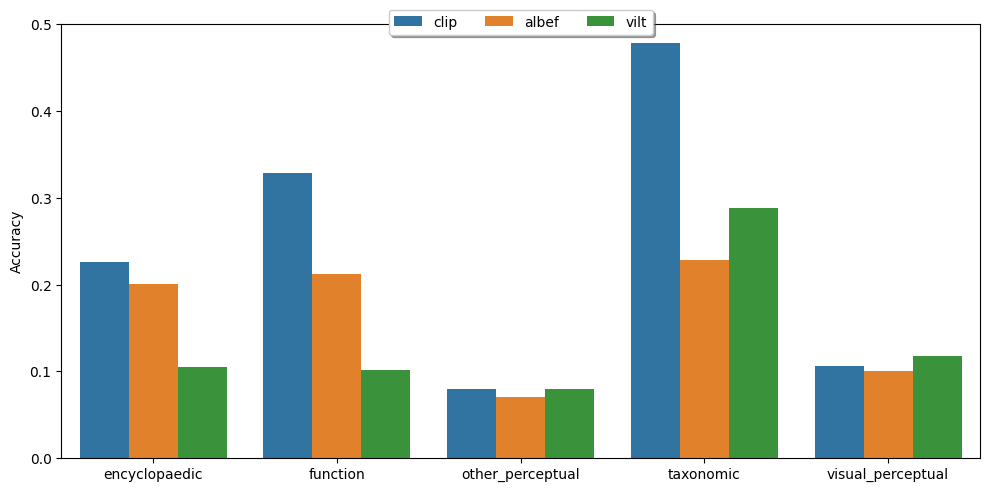

In [9]:
mean_by_f = []
for m in models:
    m_data = f_preds[m].groupby('feature_type').mean().reset_index()
    m_data['model'] = m
    mean_by_f.append(m_data)
mean_by_f = pd.concat(mean_by_f)
mean_by_f = mean_by_f.drop('top2', axis=1)

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(
    x='feature_type', y='top1', hue='model', 
    data=mean_by_f, hue_order=['clip', 'albef', 'vilt']
)
ax.set(ylim=(0, 0.5))
ax.set(xlabel=None, ylabel='Accuracy')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=6, fancybox=True, shadow=True)
plt.tight_layout()
plt.show()

In [10]:
# for m in models:
#     m_preds = []
#     f_match_path = res_path / m / 'feature_match'
#     for s, s_imgs in s_ids.items():
#         s_info = fsk.loc[fsk['synsets'] == s]
#         n_features = len(s_info)
#         for img in s_imgs:
#             i_pred = torch.load(f_match_path / f'{img}.pt', map_location=torch.device('cpu'))
#             top_indices = i_pred.topk(n_features)[1]
#             m_preds.append(
#                 [s, img, [ft_idx[int(i)] for i in top_indices], s_info['features'].tolist()]
#             )
#     m_preds = pd.DataFrame(m_preds, columns=['synset', 'image', 'features', 'preds'])
#     m_preds.to_csv(res_path / 'pred_inspection' / f'{m}_feature_preds.csv')
    

FileNotFoundError: [Errno 2] No such file or directory: '/Users/m_vilas/projects/fsk-multimodal/results/pred_inspection/clip_feature_preds.csv'

# Inspecting feature predictions

In [ ]:
f_s_accs = {}
for m in models:
    f_s_accs[m] = f_preds[m].groupby(['synset', 'feature']).mean()
f_s_acc = pd.concat(f_s_accs)
f_s_acc

In [ ]:
idx=6
print(synsets[idx])
f_s_acc.xs(synsets[idx], level=1)

In [ ]:
f_accs = {}
for m in models:
    f_acc = f_preds[m].groupby(['feature']).mean()
    f_accs[m] = (
        pd.concat([f_acc, f_preds[m]['feature'].value_counts().rename('counts')], axis=1)
    )
pd.concat(f_accs).sort_values(by='counts', axis=0, ascending=False)[:30]

__Observation__: Variability across models.

- _To-Do_: quantify variability

####  Display most and least matched images for a feature

In [ ]:
model = 'clip'
#model = 'albef'
#model = 'vilt'

In [ ]:
#f_probe = 'has_a_tail' # visual perceptual
#f_probe = 'an_animal' # taxonomic
#f_probe = 'is_edible'  # function
#f_probe = 'is_loud'  # other_peceptual
f_probe = 'found_in_kitchens' # encyclopaedic

In [ ]:
f_model = f_preds[model]
test = f_model.loc[f_model['feature']==f_probe].sort_values(by='pred_val', axis=0, ascending=False)

__Observations__: 
- An animal in clip, is it the background? (Also evident in "is edible")
- An animal in albef, there is also a visual pattern?
- An animal in vilt, related to classes?

In [ ]:
test[:10]

In [ ]:
test[-10:]

In [ ]:
c_dict = pd.Series(
    concepts_info['ids_things'].values, index=concepts_info['synsets']
).to_dict()

for idx, row in test[:10].iterrows():
    i_path = image_path / c_dict[row['synset']] / f'{row["image"]}.jpg'
    display(Image(i_path, width=300))

In [ ]:
c_dict = pd.Series(
    concepts_info['ids_things'].values, index=concepts_info['synsets']
).to_dict()

for idx, row in test[-10:].iterrows():
    i_path = image_path / c_dict[row['synset']] / f'{row["image"]}.jpg'
    display(Image(i_path, width=300))

__Observations__:
- Possible different invariances learned between models:
    - Differences in the visual patterns
    - Differences in concept-reliance

# Relationship between concept and feature prediction

### Concept detection via feature-prediction
__Q:__ Can we predict the true concept in the image from the feature predictions?

In [53]:
preds.shape

(342, 1863)

In [67]:
cd_preds = {}
for met in metrics:
    #sem_ft = StandardScaler().fit_transform(mcrae_ft.values)
    sem_ft = mcrae_ft.values
    for m in models:
        acc = 0
        f_match_path = project_path / 'results' / m / 'feature_match'
        syns = []
        imgs = []
        preds = []
        for s, s_imgs in s_ids.items():
            for img in s_imgs:
                i_pred = torch.load(f_match_path / f'{img}.pt', map_location=torch.device('cpu'))
                preds.append(i_pred.unsqueeze(dim=0).detach().numpy())
                syns.append(s)
                imgs.append(img)
        preds = np.squeeze(np.array(preds))
        preds = preds - np.mean(preds)
        #preds = StandardScaler().fit_transform(preds)

        # Cosine
        #if 'cosine' in met:
        dist = cdist(preds, sem_ft, 'cosine')
        # Pearson
        #elif 'pearson' in met:
        #dist = cdist(preds, sem_ft, 'correlation')

        top_preds = []
        for i in range(len(dist)):
            top_indices = np.argsort(dist[i])[:10]
            concept_preds = [synsets[i] for i in top_indices]
            acc += np.sum([True for c in concept_preds if c in c_preds[m].iloc[i]['preds']])
            # if syns[i] in concept_preds:
            #     acc += 1 
            top_preds.append(concept_preds)

        m_preds = pd.DataFrame({'synset':syns, 'image':imgs, 'top_preds':top_preds})
        m_preds.to_csv(res_path / 'pred_inspection' / f'{m}_{met}_concept_detection.csv')
        cd_preds[m] = m_preds
        
        print(f'Top 10 accuracy of {m}: {np.round(acc / (10*len(dist)), 3)}')
            

Top 10 accuracy of clip: 0.459
Top 10 accuracy of albef: 0.243
Top 10 accuracy of vilt: 0.383


In [38]:
np.sum([True for c in concept_preds if c in c_preds['clip'].iloc[-1]['preds']])

5

__Observation:__ Not far from real concept detection values!

!! I'm actually measuring if retrieved concept is correct, not if it correlates with the decided object.

__Observation:__ _Standarized Pearson_ gave best results.

- _Results with Cosine Distance_
    - CLIP: 0.081
    - ALBEF: 0.35
    - ViLT: 0.16
- _Results with Standarized Cosine Distance_
    - CLIP: 0.36
    - ALBEF: 0.37
    - ViLT: 0.29
- _Results with Pearson Distance_
    - CLIP: 0.38
    - ALBEF: 0.36
    - ViLT: 0.28

### TO-DO
- Do this feature-wise
- Can we say something about the other concepts being predicted?

### Correlation between concept and feature prediction
- Test if correlation is higher for related concept-feature pairs

In [64]:
cpreds = {}
fpreds = {}
for m in models:
    m_cpreds = []
    m_fpreds = []
    for s, s_imgs in s_ids.items():
        for img in s_imgs:
            m_cpreds.append(torch.load(
                res_path / m / 'concept_match'/ f'{img}.pt', map_location=torch.device('cpu')
            ))
            m_fpreds.append(torch.load(
                res_path / m / 'feature_match'/ f'{img}.pt', map_location=torch.device('cpu')
            ))
    cpreds[m] = torch.stack(m_cpreds).detach().numpy().T
    fpreds[m] = torch.stack(m_fpreds).detach().numpy().T

In [65]:
corrs = {}
for m in models:
    m_corrs = []
    for idx, row in c_preds[m].iterrows():
        synset = row['synset']
        cp = cpreds[m][synsets.index(row['synset'])]
        s_info = fsk.loc[fsk['synsets']==synset]
        for _, f_row in s_info.iterrows():
            fp = fpreds[m][f_row['features_idx']]
            dist = cdist(cp.reshape(1,-1), fp.reshape(1,-1), 'correlation')
            m_corrs.append([synset, f_row['features'], f_row['features_type'], 1 - dist[0][0]])
    corrs[m] = pd.DataFrame(m_corrs, columns =['synset', 'feature', 'feature_type', 'corr'])

clip
Ttest_relResult(statistic=221.29688460275827, pvalue=0.0)


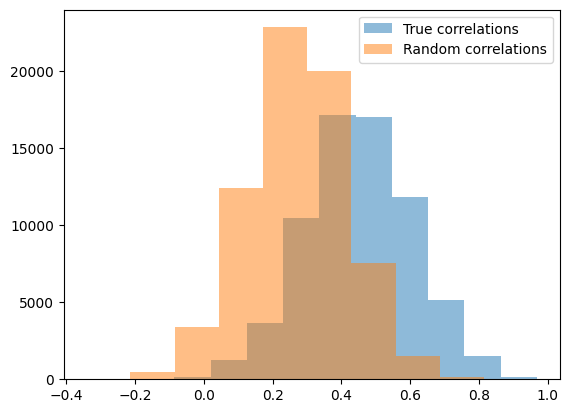

albef
Ttest_relResult(statistic=113.3745961018776, pvalue=0.0)


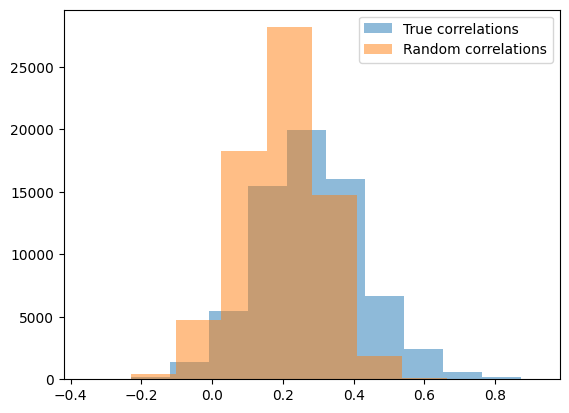

vilt
Ttest_relResult(statistic=221.83170481682853, pvalue=0.0)


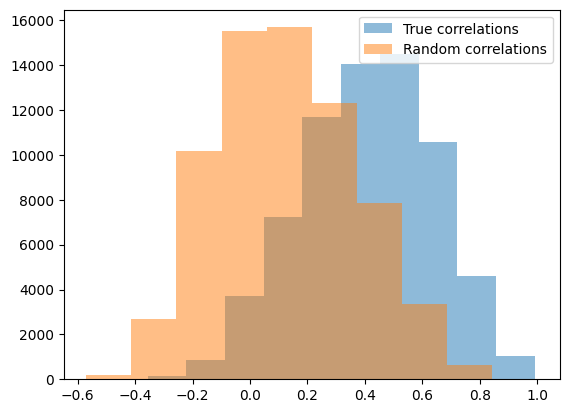

In [66]:
for m in models:
    true_corrs = corrs[m]['corr'].to_numpy()
    random_corrs = []
    for _ in range(len(corrs[m])):
        cp = cpreds[m][np.random.randint(low=0, high=len(cpreds[m]))]
        fp = fpreds[m][np.random.randint(low=0, high=len(fpreds[m]))]
        dist = cdist(cp.reshape(1,-1), fp.reshape(1,-1), 'correlation')
        random_corrs.append(1 - dist[0][0])
    random_corrs = np.array(random_corrs)

    print(m)
    print(ttest_rel(true_corrs, random_corrs))
    
    plt.hist(true_corrs, alpha=0.5, label='True correlations')
    plt.hist(random_corrs, alpha=0.5, label='Random correlations')
    plt.legend(loc='upper right')
    plt.show()

#### To-Do
- Compute mutual information instead of linear correlation
  - Probability of feature detected if concept is found? and viceversa

In [57]:
cpreds['albef'].shape

(342, 4928)

In [63]:
np.round(cpreds['albef'][:, 1], 3)

array([0.999, 0.   , 0.   , 0.   , 0.001, 0.   , 0.001, 0.   , 0.   ,
       0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.002, 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.001, 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.   , 0.006,
       0.025, 0.001, 0.002, 0.003, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.001, 0.002,
       0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.001, 0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.003, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.   ,
       0.002, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.003, 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.001, 0.   , 0.001, 0.005, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.003, 0.   ,

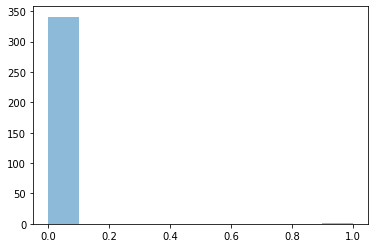

In [61]:
plt.hist(cpreds['albef'][:, 8], alpha=0.5, label='ALBEF preds')
plt.show()

# Open Questions

#### Characterize in depth WHAT features are learned for each type of network
- Characterize the dependency between detected feature and concept
    - Maybe some features are only detected for some concepts, and vice-versa
- Only observable features? (we need VG dataset)
- Dependence on word in feature description?

#### Characterize HOW these feature invariances are represented
- Detection of visual patterns related to non-observable features
  - Methods?
- Characterize the RELATIONSHIP between the feature invariances and concepts
  - (Specially important for non-observable features --> does the network recognize a concept and activates its corresponding features, or are features separately learned?)
  - Does the detection of concepts precedes the detection of features? Of viceversa?
      - Linear decoding?
      - Constrain analysis to detected features and concepts
  - Determine "causality" with ablation studies?
  - Examine transformations between selective neurons for concepts and selective neurons for features
      - E.g. are feature neurons an addition of concept neurons? A subselection? A type of linear transformation?
  - Are the internal representations of a feature the same across concepts?
  - Exploration of how the representational spaces change if both concepts are features are added to prompt.
      - Maybe this is dependent on features and concepts being recognized in the single case
  - (All these effects might only work for some concepts/features)

# Scratch space

In [23]:
# y = fpreds['clip'][0]
# X = []
# for idx, row in c_preds['clip'].iterrows():
#     net_ft = torch.load(
#         (res_path / 'clip' / 'net_ft' / f'hs_img_{row["image"]}.pt'),
#         map_location=torch.device('cpu')
#     )
#     X.append(net_ft[-1, 0, 0, :])
# X = torch.stack(X).detach().numpy()

In [24]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVR

y = fpreds['clip'][0]
X = []
for idx, row in c_preds['clip'].iterrows():
    net_ft = torch.load(
        (res_path / 'clip' / 'net_ft' / f'hs_img_{row["image"]}.pt'),
        map_location=torch.device('cpu')
    )
    X.append(net_ft[-1, 0, 0, :])
X = torch.stack(X).detach().numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y)

svr = SVR()
X_train = StandardScaler().fit_transform(X_train)

reg = make_pipeline(StandardScaler(), mutual_info_regression())

reg.fit(X_train, y_train)
#mean_absolute_error(reg.predict(X_test), y_test)
#r2_score(reg.predict(X_test), y_test)

NameError: name 'make_pipeline' is not defined

In [ ]:
test = mutual_info_regression(X, y)

In [ ]:
plt.hist(test, alpha=0.5)
plt.show()

In [ ]:
plt.hist(reg.predict(X_test) - y_test, alpha=0.5)
plt.show()

In [ ]:
plt.hist(StandardScaler().fit_transform(y_train.reshape(-1,1)), alpha=0.5)
plt.show()

In [ ]:
plt.hist(StandardScaler().fit_transform(y.reshape(-1,1)), alpha=0.5)
plt.show()

### TO-DO:
- Repeat analysis with abstract words
- Repeat analysis with subselection of words that are doing something vs not
- Clusterear